#  Fine-Tuning Deep Learning Models Using PyTorch

## Building Sequential Neural Networks Problem

In [3]:
import torch
import torch.nn.functional as F

In [4]:
# replace following class code with an easy sequential network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        #hidden layer
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        #output layer
        self.predict = torch.nn.Linear(n_hidden, n_output)
    def forward(self, x):
        x = F.relu(self.hidden(x))# activation function for hidden layer
        x = self.predict(x)             
        # linear output
        return x

In [ ]:
net1 = Net(1, 100, 1)
# easy and fast way to build your network
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 1)
)

Both deploy the same model

## Deciding the Batch Size

In [6]:
import torch
import torch.utils.data as Data

In [7]:
BATCH_SIZE = 5
x = torch.linspace(1, 10, 10)  # this is x data (torch tensor)
y = torch.linspace(10, 1, 10)  # this is y data (torch tensor)

# create dataset
torch_dataset = Data.TensorDataset(x, y)

# create data loader
loader = Data.DataLoader(
    dataset=torch_dataset,  # torch TensorDataset format
    batch_size=BATCH_SIZE,  # mini batch size
    shuffle=True,           # random shuffle for training
    num_workers=2,          # subprocesses for loading data
)

In [9]:
for epoch in range(5):   # train entire dataset 5 times
    for step, (batch_x, batch_y) in enumerate(loader):   
    # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ', batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [2. 7. 4. 8. 5.] | batch y:  [9. 4. 7. 3. 6.]
Epoch:  0 | Step:  1 | batch x:  [ 1.  6.  3. 10.  9.] | batch y:  [10.  5.  8.  1.  2.]
Epoch:  1 | Step:  0 | batch x:  [ 3. 10.  6.  9.  5.] | batch y:  [8. 1. 5. 2. 6.]
Epoch:  1 | Step:  1 | batch x:  [1. 7. 2. 4. 8.] | batch y:  [10.  4.  9.  7.  3.]
Epoch:  2 | Step:  0 | batch x:  [ 6.  4.  7. 10.  3.] | batch y:  [5. 7. 4. 1. 8.]
Epoch:  2 | Step:  1 | batch x:  [5. 9. 1. 2. 8.] | batch y:  [ 6.  2. 10.  9.  3.]
Epoch:  3 | Step:  0 | batch x:  [5. 4. 6. 9. 3.] | batch y:  [6. 7. 5. 2. 8.]
Epoch:  3 | Step:  1 | batch x:  [ 7.  2.  1. 10.  8.] | batch y:  [ 4.  9. 10.  1.  3.]
Epoch:  4 | Step:  0 | batch x:  [ 2. 10.  6.  9.  3.] | batch y:  [9. 1. 5. 2. 8.]
Epoch:  4 | Step:  1 | batch x:  [7. 4. 8. 1. 5.] | batch y:  [ 4.  7.  3. 10.  6.]


## Deciding the Learning Rate

In [10]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(12345)    
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

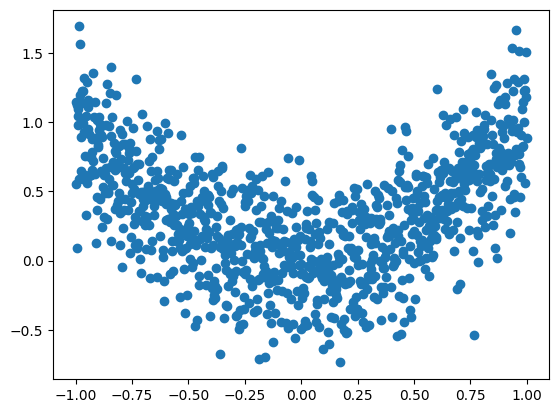

In [11]:
# sample dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.3*torch.normal(torch.zeros(*x.size()))
# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [12]:
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
dataset=torch_dataset,
batch_size=BATCH_SIZE,
shuffle=True, num_workers=2,)
torch_dataset
loader

In [14]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer
    def forward(self, x):
        x = F.relu(self.hidden(x))       
        # activation function for hidden layer
        x = self.predict(x)             
        return x

In [15]:
net_SGD       = Net()  
net_Momentum   = Net() 
net_RMSprop    = Net() 
net_Adam      = Net()  
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [17]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(),lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(),lr=LR, betas=(0.9, 0.99))

optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]
opt_Adam

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.99)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [19]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # record loss
loss_func


MSELoss()

## Performing Parallel Training

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


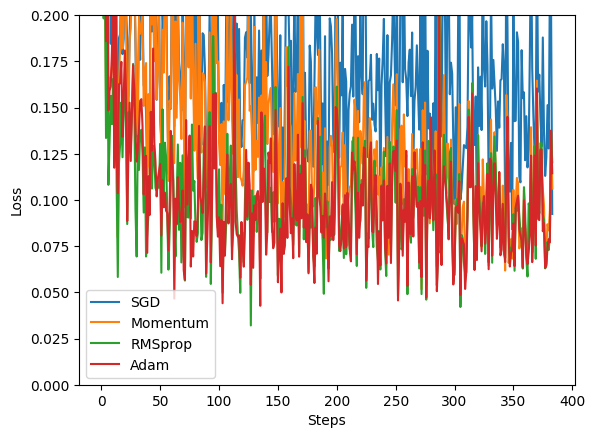

In [20]:
# Training
for epoch in range(EPOCH):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        # for each training step
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)               # get output for every net
            loss = loss_func(output, b_y)   # compute loss for every net
            opt.zero_grad()                 # clear gradients for next train
            loss.backward()                 # backpropagation, compute gradients
            opt.step()                      # apply gradients
            l_his.append(loss.data)         # loss recorder

# Plotting the loss history
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()